**FIFA ASSIGNMENT**
1. Demonstrate the data preparation & feature extraction process.

In [5]:
import pandas as pd
import numpy as np

In [6]:
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [7]:
# Loading both the training and testing datasets
male_players_data = pd.read_csv('/content/sample_data/male_players (legacy).csv')
players_22_data = pd.read_csv('/content/sample_data/players_22.csv')


<ipython-input-7-dc754809eb2d>:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  male_players_data = pd.read_csv('/content/sample_data/male_players (legacy).csv')
<ipython-input-7-dc754809eb2d>:3: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players_22_data = pd.read_csv('/content/sample_data/players_22.csv')


In [8]:
male_players_data.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [9]:
players_22_data.head()


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [10]:
all_column_names = list(male_players_data.columns)
print(all_column_names)


['player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level', 'club_team_id', 'club_name', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_sp

In [11]:
male_players_data

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,/player/269011/ziye-zhao/230002,23,2,2022-09-26,Zhao Ziye,赵梓业,RW,46,61,...,32+2,32+2,37+2,36+2,31+2,31+2,31+2,36+2,14+2,https://cdn.sofifa.net/players/269/011/23_120.png
161579,269019,/player/269019/junjie-wu/230002,23,2,2022-09-26,Wu Junjie,吴俊杰,LB,46,58,...,41+2,41+2,43+2,44+2,48+2,48+2,48+2,44+2,15+2,https://cdn.sofifa.net/players/269/019/23_120.png
161580,271093,/player/271093/kailin-barlow/230002,23,2,2022-09-26,K. Barlow,Kailin Barlow,CDM,46,58,...,45+2,45+2,47+2,47+2,46+2,46+2,46+2,47+2,14+2,https://cdn.sofifa.net/players/271/093/23_120.png
161581,271555,/player/271555/gideon-tetteh/230002,23,2,2022-09-26,G. Tetteh,Gideon Tetteh,"RW, LW",46,70,...,30+2,30+2,34+2,32+2,28+2,28+2,28+2,32+2,15+2,https://cdn.sofifa.net/players/271/555/23_120.png


In [12]:
columns_needed = ['overall', 'potential', 'value_eur', 'wage_eur', 'age',
                              'height_cm', 'weight_kg', 'international_reputation',
                              'weak_foot', 'skill_moves', 'work_rate', 'body_type',
                              'real_face', 'release_clause_eur', 'team_position',
                              'team_jersey_number', 'loaned_from', 'joined',
                              'contract_valid_until', 'nation_position',
                              'nation_jersey_number', 'pace', 'shooting', 'passing',
                              'dribbling', 'defending', 'physic']

# common relevant columns present in both datasets
relevant_columns = [col for col in columns_needed if col in male_players_data.columns and col in players_22_data.columns]

# Extracting features and target variable from the training data
X = male_players_data[relevant_columns]
y = male_players_data['overall']

In [13]:
#Processing all the quatitative features and their correlation
quantitaive = X.select_dtypes(include = [np.number])
corr_matrix = quantitaive.corr()
corr_matrix['overall'].sort_values(ascending = False)

overall                     1.000000
potential                   0.695362
passing                     0.681114
wage_eur                    0.611368
dribbling                   0.606575
release_clause_eur          0.578914
value_eur                   0.566827
physic                      0.513279
international_reputation    0.485234
shooting                    0.482498
age                         0.458390
skill_moves                 0.330951
defending                   0.325151
weak_foot                   0.217422
pace                        0.187184
weight_kg                   0.140015
height_cm                   0.044415
nation_jersey_number       -0.085530
Name: overall, dtype: float64

In [14]:
# Imputing missing values for numeric data
imputer = SimpleImputer(strategy='median')
q_columns = quantitaive.columns
quantitaive_imputed = imputer.fit_transform(quantitaive) # assign to a new variable to avoid overwriting
# Re-fetch column names after imputation in case a column was removed
#q_columns = imputer.get_feature_names_out() # SimpleImputer can tell us the new columns
#quantitative = pd.DataFrame(quantitaive_imputed, columns=q_columns) # Recreate DataFrame
#quantitaive

In [15]:
# Fill missing values with the mean for numerical features
quantitaive.fillna(quantitaive.mean(), inplace=True)


In [16]:
#Scaling the imputed numeric  data
scaler = StandardScaler()
quantitaive = pd.DataFrame(quantitaive, columns=q_columns) # Convert quantitaive back to a DataFrame
quantitaive = pd.DataFrame(scaler.fit_transform(quantitaive), columns = quantitaive.columns)
quantitaive

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,international_reputation,weak_foot,skill_moves,release_clause_eur,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic
0,3.877514,3.875315,16.451449,24.706815,0.401872,-1.813330,-1.176360,10.148137,0.091301,2.221492,0.000000,-1.298007e+00,2.387695,2.801467e+00,2.940185e+00,3.492538e+00,-1.538420e+00,-1.976505e-01
1,3.735485,3.396013,12.848571,16.687273,0.830120,0.556996,0.680668,10.148137,1.599912,3.551651,0.000000,-3.157302e+00,2.387695,3.106230e+00,2.434335e+00,2.977689e+00,-1.219687e+00,1.545335e+00
2,3.451428,3.076478,8.742966,12.104678,1.044244,-0.183731,0.680668,10.148137,-1.417310,2.221492,0.000000,-6.782422e-01,2.387695,2.572896e+00,2.636675e+00,3.080659e+00,-1.219687e+00,-8.871396e-02
3,3.451428,3.076478,8.407815,12.104678,1.472491,2.038450,2.823392,10.148137,1.599912,2.221492,0.000000,-1.298007e+00,0.762589,2.953848e+00,2.434335e+00,2.462841e+00,-1.092193e+00,2.307891e+00
4,3.451428,3.076478,10.251147,13.250326,0.615996,1.742159,2.394847,10.148137,1.599912,-1.768985,0.000000,-6.875892e+00,0.000000,5.413663e-16,-7.188561e-16,7.316434e-16,4.529478e-16,-1.548082e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,-2.797832,-1.556774,-0.371477,-0.465381,-1.525244,-0.183731,-0.319270,-0.279299,0.091301,-0.438826,-0.462217,-2.201848e-15,-0.480140,-3.223442e-01,-1.713635e+00,-1.552975e+00,-1.729661e+00,-2.267445e+00
161579,-2.797832,-2.036076,-0.371477,-0.463090,-1.311120,1.001432,1.109212,-0.279299,0.091301,-0.438826,-0.466881,-2.201848e-15,-1.244896,-2.074726e+00,-2.826505e+00,-2.891581e+00,-1.997391e-01,-8.512699e-01
161580,-2.797832,-2.036076,-0.371477,-0.474547,-1.311120,-0.035585,-0.319270,-0.279299,-1.417310,-0.438826,-0.466881,-2.201848e-15,-0.288951,-1.236630e+00,-1.410125e+00,-1.655945e+00,-5.184727e-01,-1.287016e+00
161581,-2.797832,-0.118868,-0.364774,-0.474547,-1.739368,-0.924457,-1.033512,-0.279299,0.091301,-0.438826,-0.447615,-2.201848e-15,-1.244896,-1.699631e-01,-2.118315e+00,-1.655945e+00,-1.984648e+00,-2.485318e+00


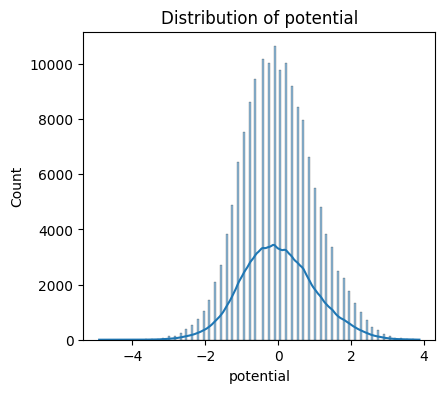

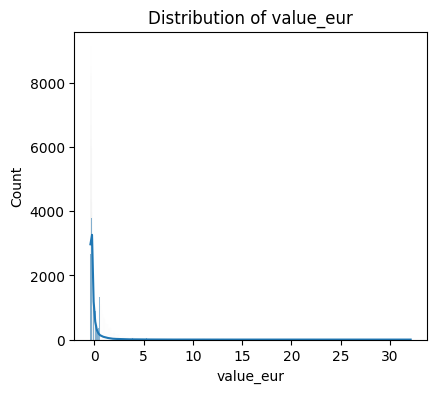

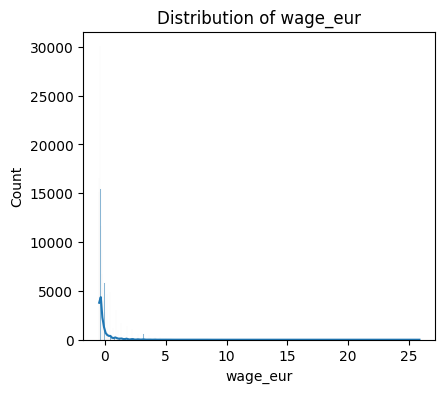

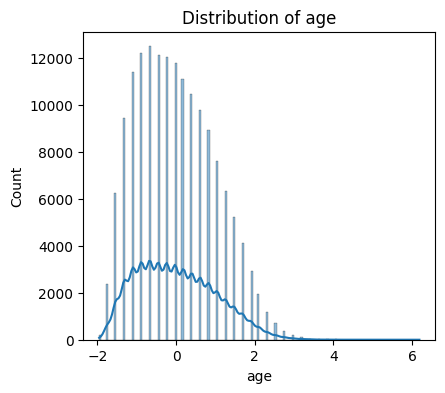

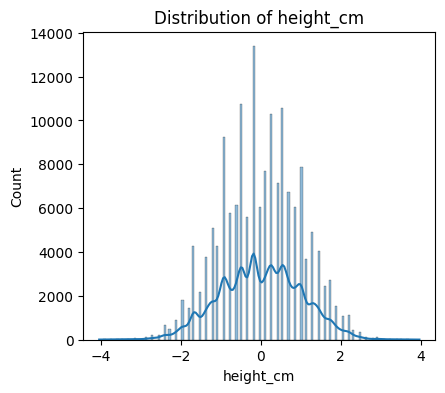

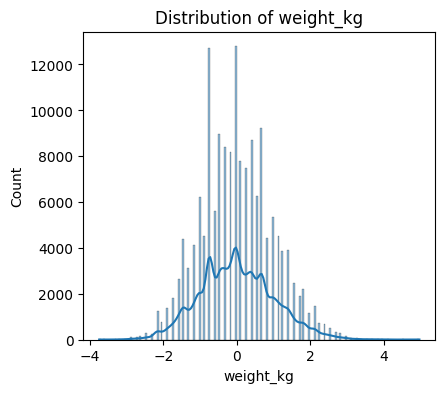

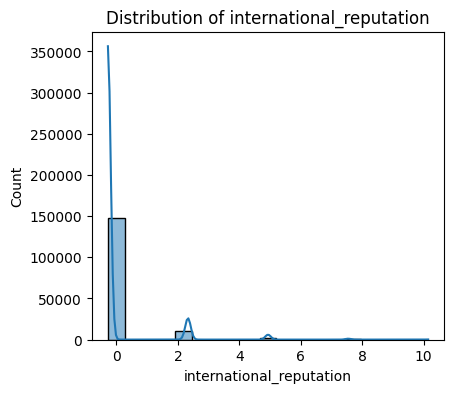

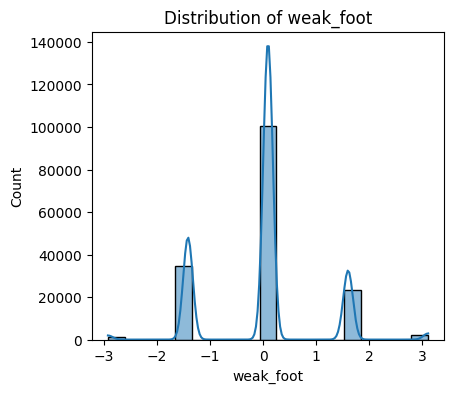

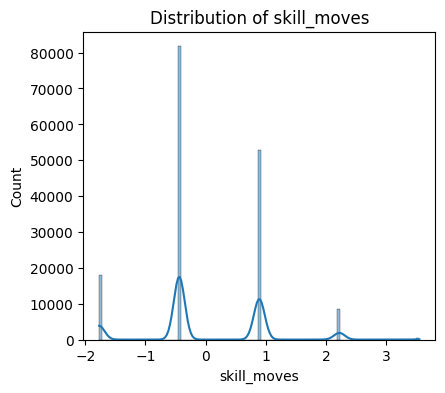

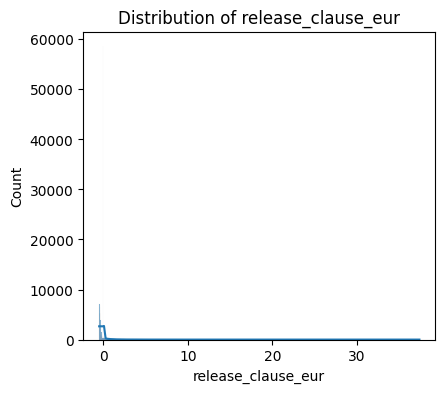

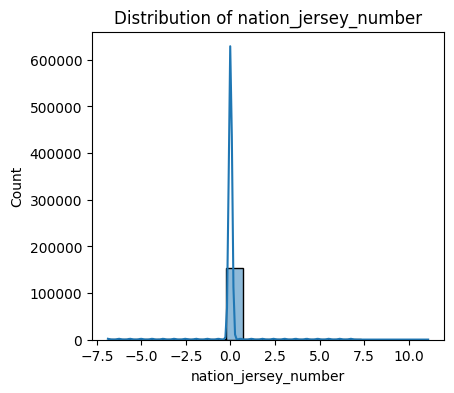

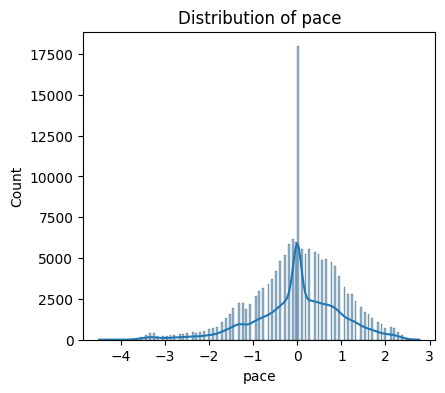

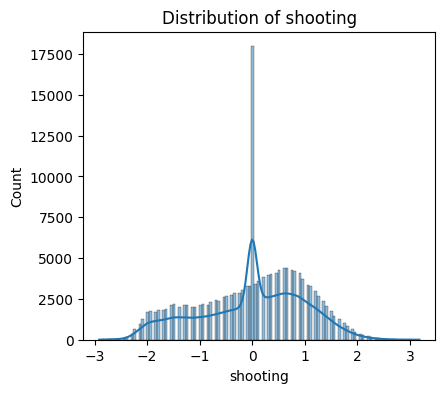

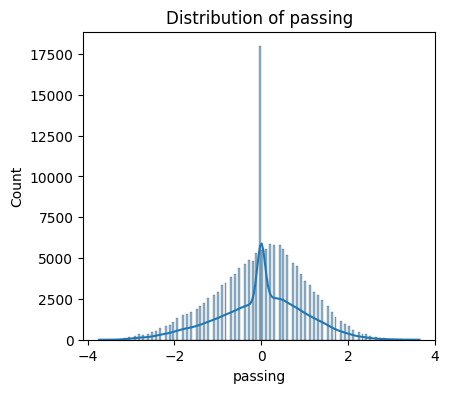

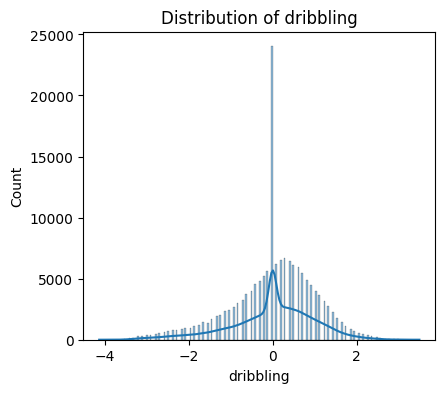

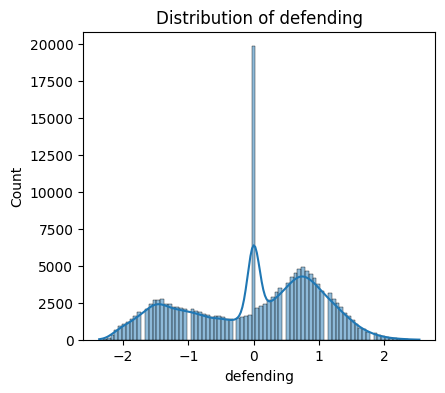

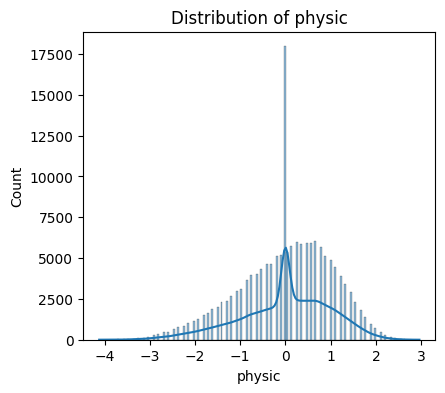

In [17]:
quantitaive.drop('overall', axis = 1, inplace = True)
import matplotlib.pyplot as plt

# Distribution plots for numeric variables
numeric_columns = quantitaive.columns
for column in numeric_columns:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(quantitaive[column], kde=True)
    plt.title(f'Distribution of {column}')

In [18]:
#Processing all the categorical features and their correlation
categorical = X.select_dtypes(include=['object'])
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   work_rate        161583 non-null  object
 1   body_type        161583 non-null  object
 2   real_face        161583 non-null  object
 3   nation_position  9316 non-null    object
dtypes: object(4)
memory usage: 4.9+ MB


In [21]:
categorical.drop(columns = [column for column in categorical.columns if column not in columns_needed], inplace =True)
categorical.info()

categorical = categorical.fillna(categorical.mode().iloc[0])

print(categorical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   work_rate        161583 non-null  object
 1   body_type        161583 non-null  object
 2   real_face        161583 non-null  object
 3   nation_position  9316 non-null    object
dtypes: object(4)
memory usage: 4.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   work_rate        161583 non-null  object
 1   body_type        161583 non-null  object
 2   real_face        161583 non-null  object
 3   nation_position  161583 non-null  object
dtypes: object(4)
memory usage: 4.9+ MB
None


In [22]:
#Encoding the categorical data using onehot encoder
categorical = pd.get_dummies(categorical, drop_first=True)
categorical

,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,body_type_Lean (170-185),body_type_Lean (185+),...,nation_position_RCB,nation_position_RCM,nation_position_RDM,nation_position_RF,nation_position_RM,nation_position_RS,nation_position_RW,nation_position_RWB,nation_position_ST,nation_position_SUB
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
161579,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
161580,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
161581,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [23]:
#replacing NaN with mode
categorical.fillna(categorical.mode().iloc[0], inplace=True)

In [24]:
#concatinating the categorical and numeric data
X = pd.concat([categorical, quantitaive], axis = 1)

In [25]:
#standardizing the feartures of X
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,body_type_Lean (170-185),body_type_Lean (185+),...,weak_foot,skill_moves,release_clause_eur,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic
0,-0.203806,-0.456147,-0.15569,-0.04558,-0.160766,-0.314717,4.427436,-1.104179,-0.526464,-0.337736,...,0.091301,2.221492,-5.628653e-18,-1.298007e+00,2.387695e+00,2.801467e+00,2.940185e+00,3.492538e+00,-1.538420e+00,-1.976505e-01
1,4.906623,-0.456147,-0.15569,-0.04558,-0.160766,-0.314717,-0.225864,-1.104179,-0.526464,-0.337736,...,1.599912,3.551651,-5.628653e-18,-3.157302e+00,2.387695e+00,3.106230e+00,2.434335e+00,2.977689e+00,-1.219687e+00,1.545335e+00
2,4.906623,-0.456147,-0.15569,-0.04558,-0.160766,-0.314717,-0.225864,-1.104179,-0.526464,-0.337736,...,-1.417310,2.221492,-5.628653e-18,-6.782422e-01,2.387695e+00,2.572896e+00,2.636675e+00,3.080659e+00,-1.219687e+00,-8.871396e-02
3,-0.203806,-0.456147,-0.15569,-0.04558,-0.160766,-0.314717,4.427436,-1.104179,-0.526464,-0.337736,...,1.599912,2.221492,-5.628653e-18,-1.298007e+00,7.625886e-01,2.953848e+00,2.434335e+00,2.462841e+00,-1.092193e+00,2.307891e+00
4,-0.203806,-0.456147,-0.15569,-0.04558,-0.160766,-0.314717,-0.225864,0.905650,-0.526464,-0.337736,...,1.599912,-1.768985,-5.628653e-18,-6.875892e+00,3.883771e-16,-1.284435e-16,7.196973e-17,-1.013973e-16,1.222644e-16,-6.981551e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,-0.203806,-0.456147,-0.15569,-0.04558,-0.160766,-0.314717,-0.225864,0.905650,1.899465,-0.337736,...,0.091301,-0.438826,-4.622169e-01,-4.906348e-17,-4.801397e-01,-3.223442e-01,-1.713635e+00,-1.552975e+00,-1.729661e+00,-2.267445e+00
161579,-0.203806,-0.456147,-0.15569,-0.04558,-0.160766,-0.314717,-0.225864,0.905650,-0.526464,-0.337736,...,0.091301,-0.438826,-4.668813e-01,-4.906348e-17,-1.244896e+00,-2.074726e+00,-2.826505e+00,-2.891581e+00,-1.997391e-01,-8.512699e-01
161580,-0.203806,2.192276,-0.15569,-0.04558,-0.160766,-0.314717,-0.225864,-1.104179,-0.526464,-0.337736,...,-1.417310,-0.438826,-4.668813e-01,-4.906348e-17,-2.889508e-01,-1.236630e+00,-1.410125e+00,-1.655945e+00,-5.184727e-01,-1.287016e+00
161581,-0.203806,-0.456147,-0.15569,-0.04558,-0.160766,-0.314717,-0.225864,0.905650,-0.526464,-0.337736,...,0.091301,-0.438826,-4.476152e-01,-4.906348e-17,-1.244896e+00,-1.699631e-01,-2.118315e+00,-1.655945e+00,-1.984648e+00,-2.485318e+00


In [26]:
#Now, we will split the training data to training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#We will use four models
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}


In [28]:
#Evaluating the models using cross-validation
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    results[model_name]= np.sqrt(-scores)

print("Cross-validation results:")
for model_name, scores in results.items():
    print(f"{model_name}: {scores.mean():.2f} (+/- {scores.std():.2f}))")

Cross-validation results:
Linear Regression: 2.15 (+/- 0.01))
Gradient Boosting: 1.16 (+/- 0.00))
XGBoost: 0.84 (+/- 0.00))


Since XGBoost regresor has the lowest RMSE, we are going to use RMSE and then finetune it, train and test it again.

In [29]:
# fine tuning the model, training then testing them again:
# Hyperparameter grids for each model
param_grid = {
        'n_estimators': [100, 200, 300, 400],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }



In [30]:
# Initialize the GridSearchCV
grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_squared_error')

In [31]:
# Get the best estimator
best_xgb_model = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 400}


In [32]:
# Train the best model on the full training data
best_xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = best_xgb_model.predict(X_val)

# Evaluate the model using MAE and RMSE
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)

In [33]:
print(f"""Fine-Tuned XGBoost Regressor:
    Root Mean Squared Error = {rmse}
""")

Fine-Tuned XGBoost Regressor:
    Root Mean Squared Error = 0.7342706474357228



**Use the data(players_22) to test how good is the model with completely new data**

In [40]:
#Getting the data ready for testing
X_test = players_22_data[relevant_columns]
y_test = players_22_data['overall']


In [41]:
quant= X_test.select_dtypes(include = [np.number])
imputer = SimpleImputer(strategy='median')
qcolumns = quant.columns
quant_imputed = imputer.fit_transform(quant)
quant.fillna(quant.mean(), inplace=True)

In [42]:
scaler = StandardScaler()
quant = pd.DataFrame(quant, columns=qcolumns) # Convert quantitaive back to a DataFrame
quant = pd.DataFrame(scaler.fit_transform(quant), columns = quant.columns)
quant.drop('overall', axis = 1, inplace = True)

In [43]:
#Processing all the categorical features and their correlation
cat = X_test.select_dtypes(include=['object'])
cat.drop(columns = [column for column in cat.columns if column not in columns_needed], inplace =True)
cat = cat.fillna(cat.mode().iloc[0])
#Encoding the categorical data using onehot encoder
cat = pd.get_dummies(cat, drop_first=True)
#replacing NaN with mode
cat.fillna(cat.mode().iloc[0], inplace=True)

In [44]:
#concatinating the categorical and numeric data from the testing dataset
X_test = pd.concat([cat, quant], axis = 1)

In [45]:
#standardizing the feartures of X_test
scaler = StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)
X_test

,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,body_type_Lean (170-185),body_type_Lean (185+),...,weak_foot,skill_moves,release_clause_eur,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic
0,-0.209378,-0.484779,-0.155637,-0.04842,-0.157553,-0.329091,4.769890,-1.041995,-0.519278,-0.334689,...,1.569295,2.146241,9.591752,-1.837844e+00,1.628331,2.992852,3.548135,3.564477,-1.159683,0.019139
1,-0.209378,2.062795,-0.155637,-0.04842,-0.157553,-0.329091,-0.209648,-1.041995,-0.519278,-0.334689,...,1.569295,2.146241,13.244084,-2.553556e+00,0.949332,2.992852,2.284233,2.575529,-0.504629,1.860333
2,4.776049,-0.484779,-0.155637,-0.04842,-0.157553,-0.329091,-0.209648,-1.041995,-0.519278,-0.334689,...,1.569295,3.448937,5.380179,-3.984981e+00,1.822331,3.143798,2.389558,2.795295,-1.159683,1.102194
3,-0.209378,2.062795,-0.155637,-0.04842,-0.157553,-0.329091,-0.209648,-1.041995,-0.519278,-0.334689,...,3.058403,3.448937,16.109335,-1.255702e-17,2.210331,2.313597,3.021509,3.454594,-0.963167,-0.197472
4,-0.209378,-0.484779,-0.155637,-0.04842,-0.157553,-0.329091,-0.209648,-1.041995,-0.519278,-0.334689,...,3.058403,2.146241,15.660560,-3.984981e+00,0.755332,2.540015,3.758786,2.795295,0.805478,1.427111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,-0.209378,-0.484779,-0.155637,-0.04842,-0.157553,-0.329091,-0.209648,0.959697,1.925751,-0.334689,...,0.080187,-0.459150,-0.363165,-1.255702e-17,-0.990667,-1.309098,-1.191498,-1.600026,-0.635640,-1.713750
19235,-0.209378,-0.484779,-0.155637,-0.04842,-0.157553,-0.329091,-0.209648,0.959697,1.925751,-0.334689,...,0.080187,-0.459150,-0.357711,-1.255702e-17,-0.893667,-1.007207,-0.770197,-1.819792,-0.701145,-1.497139
19236,-0.209378,-0.484779,-0.155637,-0.04842,-0.157553,-0.329091,-0.209648,0.959697,1.925751,-0.334689,...,0.080187,-0.459150,-0.358953,-1.255702e-17,-0.796667,-1.158153,-1.296823,-1.490143,-0.701145,-1.388833
19237,-0.209378,-0.484779,-0.155637,-0.04842,-0.157553,-0.329091,-0.209648,0.959697,1.925751,-0.334689,...,0.080187,-0.459150,-0.354535,-1.255702e-17,-0.020668,-0.478897,-2.244749,-1.600026,-2.404285,-2.471889


In [46]:
# Predic the overall ratings for the test data
y_test_pred = players_22_data['overall']
y_test_pred= best_xgb_model.predict(X_test)

In [47]:
y_test_pred

array([92.89517 , 91.30785 , 90.64248 , ..., 49.173622, 50.05365 ,
       50.1134  ], dtype=float32)

In [49]:
# Evaluate the model using MAE and RMSE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mae_players_22 = mean_absolute_error(y_test, y_test_pred)
mse_players_22 = mean_squared_error(y_test, y_test_pred)
rmse_players_22 = np.sqrt(mse_players_22)
r2_players_22 = r2_score(y_test, y_test_pred)

print(f"""Performance on players_22 dataset:
    Mean Absolute Error = {mae_players_22}
    Mean Squared Error = {mse_players_22}
    Root Mean Squared Error = {rmse_players_22}
    R2 score = {r2_players_22}
""")

Performance on players_22 dataset:
    Mean Absolute Error = 1.0131604587085605
    Mean Squared Error = 1.5520705032143516
    Root Mean Squared Error = 1.2458212163927662
    R2 score = 0.9672110192933264



**Saving the predicted data in a csv file**

In [53]:
# Save the predictions
import pickle
players_22_data.to_pickle('predicted_players_22.pkl')
print("Predictions saved to predicted_players_22.pkl")


Predictions saved to predicted_players_22.pkl


In [54]:
filename = 'predicted_players_22.pkl'
pickle.dump(filename, open(filename, 'wb'))
saved_file = pickle.load(open(filename, 'rb'))

# Save the model
loaded_model = 'best_xgb_model.pkl'
pickle.dump(best_xgb_model, open(loaded_model, 'wb'))
loaded_model = pickle.load(open(loaded_model, 'rb'))

